### Import

In [1]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product
plt.style.use("classic")
%matplotlib inline
import seaborn as sns
import ROOT as r
%jsroot on

Welcome to JupyROOT 6.26/02


### Retrieve data

In [2]:
filename = "/Volumes/javimarino/Padova/AdvancedLab/data/20220524/final/dfMI_psa_20220524.pkl"

# retain data
print('Creating DataFrame...\n')
df = pd.read_pickle(filename)


# reset index because pickle data is not well formatted
df.reset_index(drop=True, inplace=True)
df

Creating DataFrame...



,TIMETAG,ENERGY,PSA
0,67663292711396000,110,0.748709
1,67663308947588000,113,0.711100
2,67663324787492000,180,0.744719
3,67663337269988000,247,0.740855
4,67663338773628000,94,0.721414
...,...,...,...
1728219,370354730440000,1660,0.741557
1728220,370358112308000,212,0.733923
1728221,370359349652000,120,0.756627
1728222,370374058888000,211,0.731907


In [14]:
bins = 8192


h = r.TH2I("hist", "", bins, 0, bins, 1000, 0, 1)

for k in range(len(df)):         
     # Now you have acess to the leaves/branches of each entry in the tree, e.g.
     h.Fill(df["ENERGY"][k], df["PSA"][k])


Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).


In [15]:
c1 = r.TCanvas("c1", "", 800, 600)
h.Draw("COLZ")
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


### Graphics

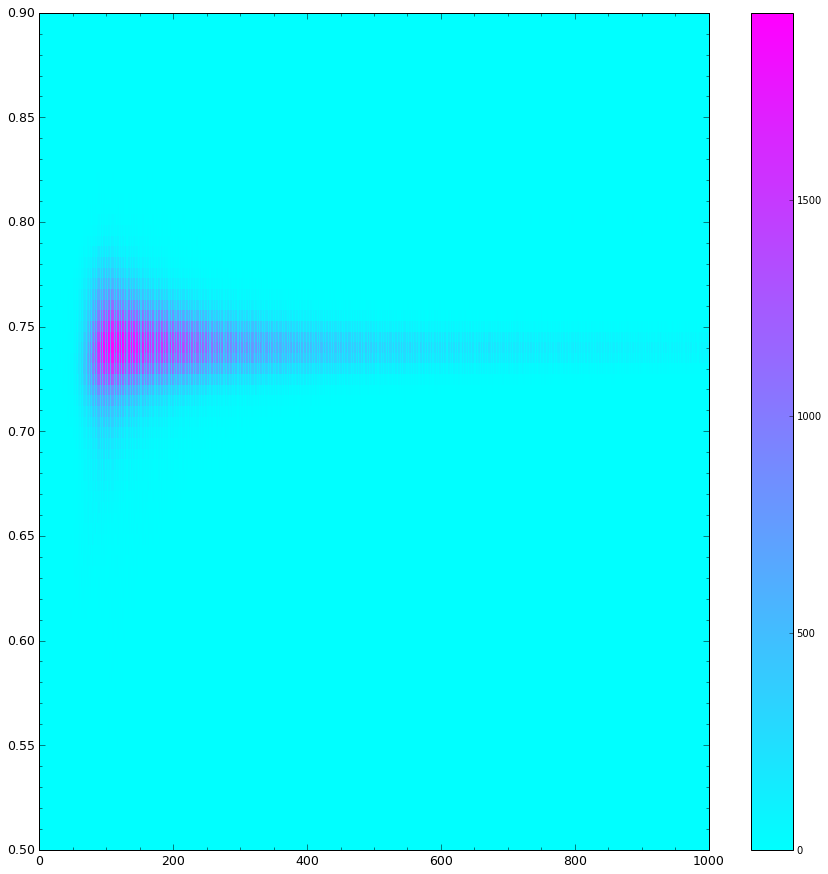

In [25]:
fig, ax = plt.subplots(figsize=(15, 15)); fig.patch.set_facecolor('xkcd:white')

ax.tick_params(which = 'both', axis = 'both', direction='in', right = True, top = True, length = 6)
ax.minorticks_on()
ax.tick_params(which = 'minor', axis = 'both', direction='in', right = True, top = True, length = 3)
ax.tick_params(axis = 'both', labelsize = 12.5)
h2_PD = ax.hist2d(x = df['ENERGY'], y = df['PSA'], bins = (5000, 5000), cmap = "cool") # afmhot, hot, gist_heat are others that work reasonably well

ax.set_ylim(0.5, 0.9)
ax.set_xlim(0., 1000)
fig.colorbar(h2_PD[3], ax=ax)

In [22]:
# correlated gamma energies
gg_energy = np.array(df_final["ENERGY_PD"][df_final[ (df_final["pID_PD"] == "gamma") & (df_final["pID_MI"] == "gamma") ].index]), np.array(df_final["ENERGY_MI"][df_final[ (df_final["pID_PD"] == "gamma") & (df_final["pID_MI"] == "gamma") ].index])

neutrons_energy = np.hstack((np.array(df_final["ENERGY_PD"][df_final[ (df_final["pID_PD"] == "neutron") & (df_final["pID_MI"] == "gamma") ].index]), np.array(df_final["ENERGY_MI"][df_final[ (df_final["pID_MI"] == "neutron") & (df_final["pID_PD"] == "gamma") ].index])))
gammas_energy = np.hstack((np.array(df_final["ENERGY_PD"][df_final[ (df_final["pID_PD"] == "gamma") & (df_final["pID_MI"] == "neutron") ].index]), np.array(df_final["ENERGY_MI"][df_final[ (df_final["pID_MI"] == "gamma") & (df_final["pID_PD"] == "neutron") ].index])))
ng_energy = [neutrons_energy, gammas_energy]

nn_energy = np.array(df_final["ENERGY_PD"][df_final[ (df_final["pID_PD"] == "neutron") & (df_final["pID_MI"] == "neutron") ].index]), np.array(df_final["ENERGY_MI"][df_final[ (df_final["pID_PD"] == "neutron") & (df_final["pID_MI"] == "neutron") ].index])

NameError: name 'df_final' is not defined

Text(0.5, 0.98, 'neutron-neutron correlation')

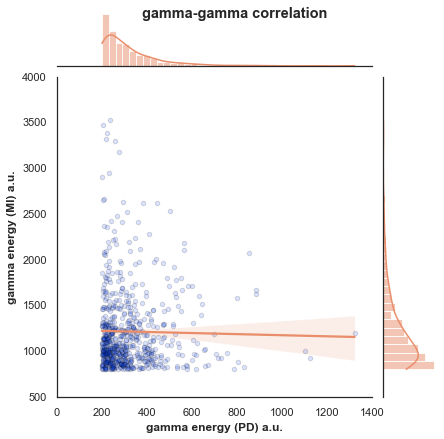

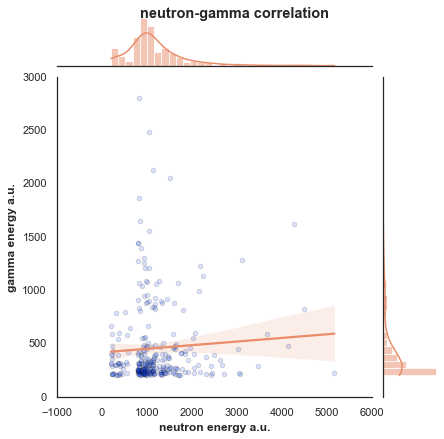

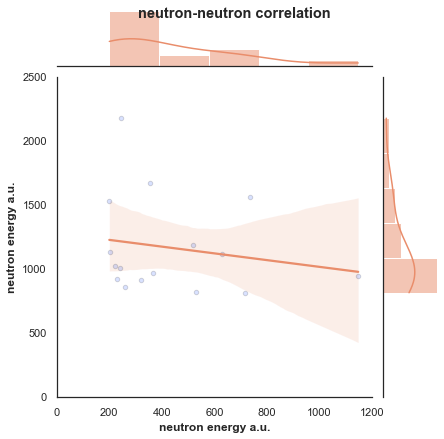

In [43]:
sns.set_theme(context = "notebook", style = "white", palette = "bright")
sns.set_palette("flare")

g = sns.jointplot(x = gg_energy[0], y = gg_energy[1], kind = "reg", scatter = False)
g.ax_joint.scatter(gg_energy[0], gg_energy[1], marker = "o", alpha = 0.15, edgecolors = "black")
g.ax_joint.set_xlabel("gamma energy (PD) a.u.", fontweight='bold')
g.ax_joint.set_ylabel("gamma energy (MI) a.u.", fontweight='bold')
g.fig.suptitle("gamma-gamma correlation", fontweight = "bold", fontsize = 14.5)

g = sns.jointplot(x = ng_energy[0], y = ng_energy[1], kind = "reg", scatter = False)
g.ax_joint.scatter(ng_energy[0], ng_energy[1], marker = "o", alpha = 0.15, edgecolors = "black")
g.ax_joint.set_xlabel("neutron energy a.u.", fontweight='bold')
g.ax_joint.set_ylabel("gamma energy a.u.", fontweight='bold')
g.fig.suptitle("neutron-gamma correlation", fontweight = "bold", fontsize = 14.5)


g = sns.jointplot(x = nn_energy[0], y = nn_energy[1], kind = "reg", scatter = False)
g.ax_joint.scatter(nn_energy[0], nn_energy[1], marker = "o", alpha = 0.15, edgecolors = "black")
g.ax_joint.set_xlabel("neutron energy a.u.", fontweight='bold')
g.ax_joint.set_ylabel("neutron energy a.u.", fontweight='bold')
g.fig.suptitle("neutron-neutron correlation", fontweight = "bold", fontsize = 14.5)